<a href="https://colab.research.google.com/github/Codeguy225/Project-2/blob/main/Derek_Overton_Project_Two_Part_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Adult Income**

**Name:** **Derek Overton**

**Date:** **2/1/2023**

**Assignment:** **Project 2 Part 3**

# **Assignment Part 2:**
Using the approved dataset you proposed for project 2 part 1 last week, you will clean and explore the data set.

To meet the requirements for this week you must have:

- Deleted unnecessary columns.
- Deleted duplicate rows.
- Identified and addressed missing values.
I- dentified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).
- Produced univariate visuals for the target and all features.
- Identified outliers.
- Clearly commented all of your cleaning steps and described any decisions you made.

Commit your file to your Github repository and submit the link below.

#**Assignment Part 3:**

**Note: You are not clustering your data for this assignment.**
- For this part of the project, you will continue your data exploration by:
 - Identifying any moderate or strong correlations between your target and your features and/or between one feature and another using a correlation heatmap.
 - Creating multivariate (multiple variables) exploratory visualizations to further understand your data and search for trends.
- Then, choose two visualizations from your analysis that demonstrate key trends you found that will be of interest to a stakeholder. These visuals should be reporting quality with titles, labels, and a short explanation of the trend. Be sure to explain in a text cell the finding associated with each visual. Both of these visualizations should be easily understood by a non-technical audience (Neither should be histograms, boxplots, or correlation plots).

Please submit the link to your GitHub Repository.

#**Assignment Part 4:**
You are now entering into the model development phase of the project!

- Ensure that you complete the appropriate pre-processing steps.
- Try multiple models and tune the hyperparameters of each model to optimize model performance (include all models and hyperparameters tested in addition to the final model).
- Perform PCA or another feature engineering technique on your dataset to see how this impacts your results. (We encourage you to try multiple techniques depending on your data!).
- Evaluate model performance with appropriate metrics for the model.
- Choose your "production" model and justify this decision.
- Go back through your code and ensure that you have provided clear comments (remember this is for your portfolio!).
- Update your project readme and describe your final model, your final model evaluation metrics, and explain whether or not your model would be useful in production and if so, how it should be used.
- Commit your code to GitHub.

Submit the link to your GitHub repository.

##**Peliminary**

###Import Libaries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import set_config
set_config(display = 'diagram')

## **1. Load and inspect the data**

### **Mount and Load the Data**

In [2]:
# Mount Drive
from google.colab import drive 
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
#Load Data 
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Stack 2/Week 3 /DATA/Adult Income.csv')

### **Inspect the Data**

In [4]:
# Review Data Information
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### **Set display Options** 

In [5]:
# Display the number of rows and columns for the dataframe
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 48842 rows, and 15 columns.
The rows represent 48842 observations, and the columns represent 14 features and 1 target variable.


In [6]:
# Display the descriptive of all data
df.describe(include = 'all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


- on my intinal review of the data, there are many missing values. There are 15 columns and 48842 rows. There also appear to be inconsistant values as well in the given data. We will deal with all these issues below.

## **2. Prepare/clean the data for exploratory analysis purposes.**

### **Duplicates**

In [7]:
# Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 52 duplicate rows.


In [8]:
# Drop duplicates 
df.drop_duplicates(inplace = True)

In [9]:
# Recheck for duplicates 
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


### **Inspect Column Datatypes for Errors**

In [10]:
# Display the column names and datatypes for each column
# Columns with mixed datatypes are identified as an object datatype
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [11]:
# Display the column names, count of non-null values, and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48790 non-null  int64 
 1   workclass        48790 non-null  object
 2   fnlwgt           48790 non-null  int64 
 3   education        48790 non-null  object
 4   educational-num  48790 non-null  int64 
 5   marital-status   48790 non-null  object
 6   occupation       48790 non-null  object
 7   relationship     48790 non-null  object
 8   race             48790 non-null  object
 9   gender           48790 non-null  object
 10  capital-gain     48790 non-null  int64 
 11  capital-loss     48790 non-null  int64 
 12  hours-per-week   48790 non-null  int64 
 13  native-country   48790 non-null  object
 14  income           48790 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


###**Checking for Missing Values**

In [12]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

###**Analysis of dataset**

In [13]:
for i in df.columns:
    a = df.value_counts(i)
    print(f'\n\n\nvalues of {a}')




values of age
36    1348
35    1336
33    1335
23    1325
31    1324
      ... 
88       6
85       5
87       3
89       2
86       1
Length: 74, dtype: int64



values of workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
dtype: int64



values of fnlwgt
203488     21
190290     19
120277     19
125892     18
126569     18
           ..
163443      1
163393      1
163385      1
163380      1
1490400     1
Length: 28523, dtype: int64



values of education
HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool   

so, from the above description

**coloumns which have "?" or missing values are :**

- workclass (categorical)
- occupation (categorical)
- native-country (categorical)

**coloumns which have "0" or missing values are :**

capital-gain
capital-loss

###**Handling missing values of categorical columns**


- Removing the columns (Capital-gain and capital-loss) because more than 90% entries are not filled i.e Zero.

In [14]:
df = df.drop(['education'],axis=1)
df

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [15]:
# Replacing "?" with NaN
df.replace('?',np.nan,inplace=True)
df.isnull().sum()

age                   0
workclass          2795
fnlwgt                0
educational-num       0
marital-status        0
occupation         2805
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      856
income                0
dtype: int64

In [16]:
# Performing SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
imputer

SimpleImputer(strategy='most_frequent')

In [17]:
# Copy of DataFrame
dfc =df.copy()

In [18]:
# Review Copy of DataFrame
dfc.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [19]:
print(dfc.dtypes)

age                 int64
workclass          object
fnlwgt              int64
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object


In [20]:
# Performing the Column_transformation:
encode = preprocessing.LabelEncoder()
dfc['income'] = encode.fit_transform(dfc['income'])

In [21]:
# Check Classes 
encode.classes_

array(['<=50K', '>50K'], dtype=object)

In [22]:
# Split Data
X = dfc.drop('income',axis=1)
y = dfc['income']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

In [24]:
#OneHotEncoder
ohe = OneHotEncoder(sparse= False, handle_unknown='ignore')

In [25]:
#Standard Scaler
scaler = StandardScaler()

In [26]:
#Instantiate the selectors 
num_selector = make_column_selector(dtype_include = 'number')
cat_selector = make_column_selector(dtype_include = 'object')

In [27]:
# Creating Transformer Two
transformer2 = RandomForestClassifier()
transformer2

RandomForestClassifier()

In [28]:
#Forming pipelines
num_pipe = make_pipeline(scaler, imputer)
cat_pipe = make_pipeline(ohe)

In [29]:
#Create Tuples
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)

In [30]:
#Instantiate preprocessor Transformers
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f630db8e1f0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f630db8e190>)])

In [31]:
# Createing Pipeline
pipe = Pipeline([('preprocessor', preprocessor), ('transformer2', transformer2)])
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f630db8e1f0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f630db8e190>)])),
                ('transformer2', RandomForestClassifier())])

In [32]:
# Fitting the Pipline
pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f630db8e1f0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f630db8e190>)])),
                ('transformer2', RandomForestClassifier())])

In [33]:
# Prediction
y_pred = pipe.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [34]:
# Accuracy Check
accuracy_score(y_test,y_pred)

0.8594851615018856

In [35]:
#F1 Score Check
f1_score(y_test, y_pred)

0.6789059572873736

##**Univariate Visuals** 

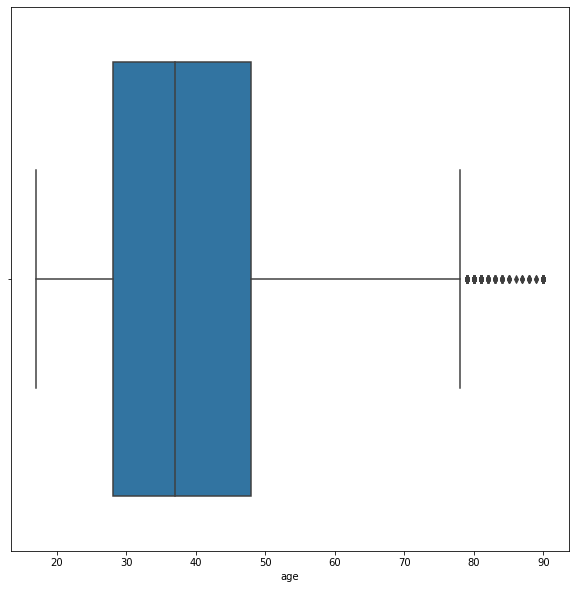

In [36]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="age", data=dfc)
plt.show()

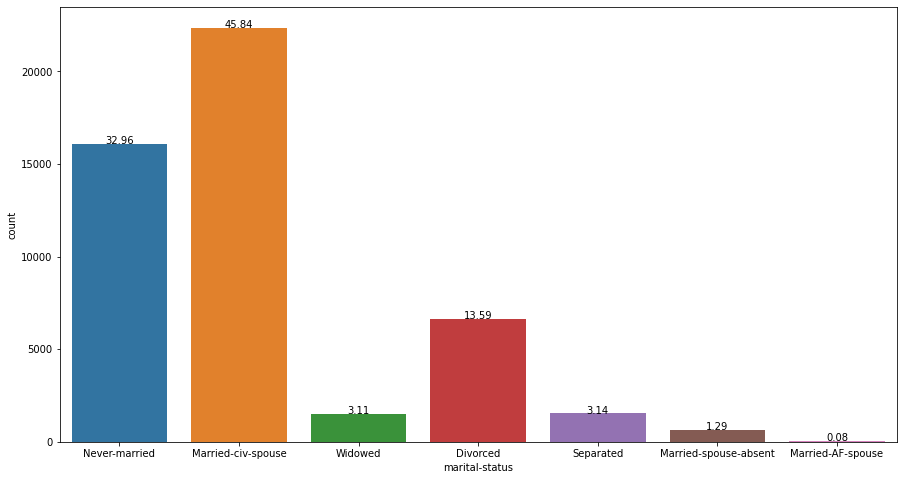

In [37]:
plt.figure(figsize=(15,8))
total = float(len(dfc) )

ax = sns.countplot(x="marital-status", data=dfc)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

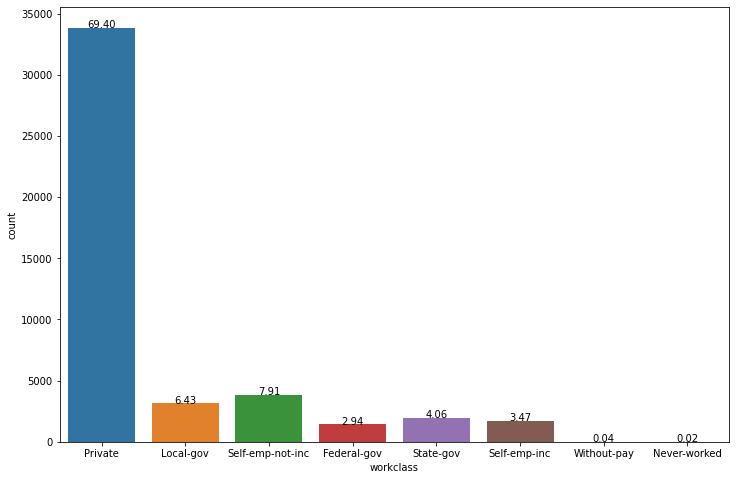

In [38]:
plt.figure(figsize=(12,8))

total = float(len(dfc["income"]) )

ax = sns.countplot(x="workclass", data=dfc)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

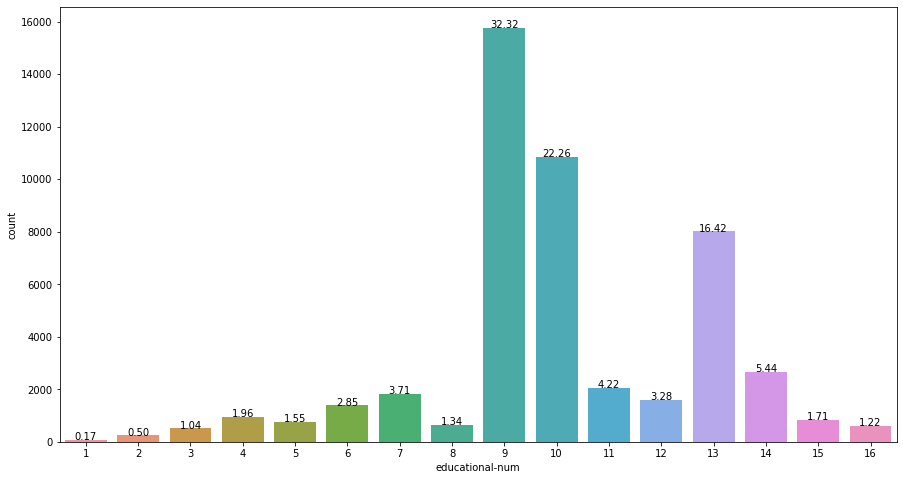

In [39]:
plt.figure(figsize=(15,8))
total = float(len(dfc) )

ax = sns.countplot(x="educational-num", data=dfc)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

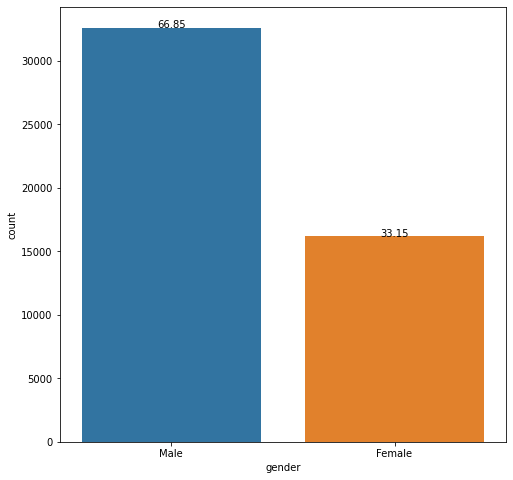

In [40]:
plt.figure(figsize=(8,8))
total = float(len(dfc) )

ax = sns.countplot(x="gender", data=dfc)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

## **3. Correlation and Heat Maps**

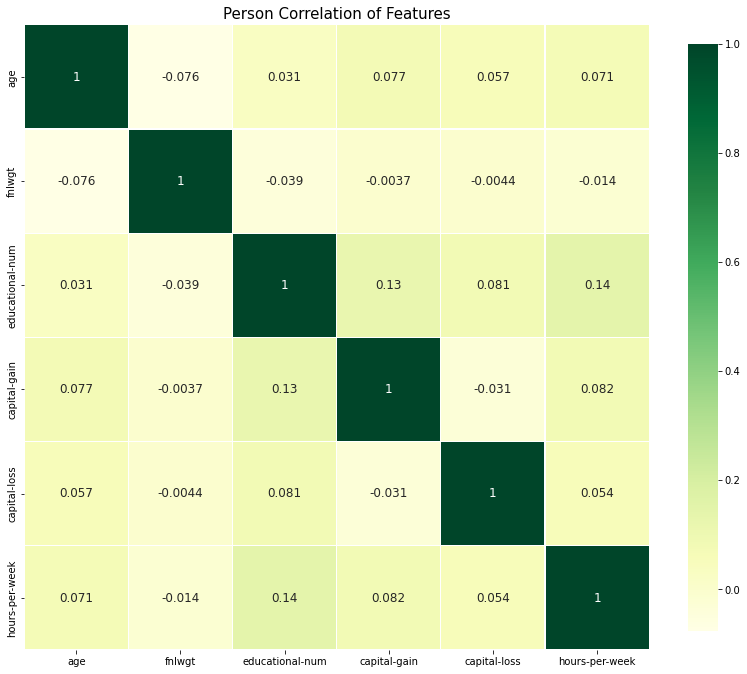

In [41]:
def correlation_heatmap(dfc):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Person Correlation of Features', y=1.05, size=15)

correlation_heatmap(dfc)

##**4. Multivariate Visualizations**

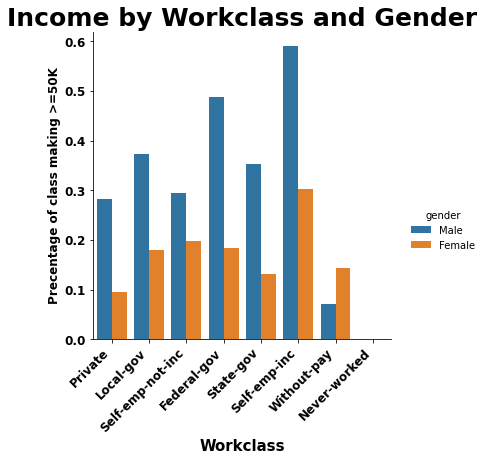

In [42]:
sns.catplot(x="workclass", y="income", hue="gender", kind="bar", data=dfc, ci= None)
plt.xticks(rotation= 45, fontsize = 12, fontweight = 'bold', ha = 'right')
plt.yticks(fontsize = 12, fontweight= "bold")
plt.xlabel('Workclass',fontweight='bold', fontsize='15')
plt.ylabel('Precentage of class making >=50K',fontweight='bold', fontsize='12')
plt.title('Income by Workclass and Gender',fontweight='bold', color = 'Black', fontsize='25');

The first Trend that is recognized is Income by Workclass and Gender
- The decimals represent the precentage of Workclass and Gender making greater than 50K.
- The trend is that most people are choosing to work as Self-emp-inc. This is most likely becaues they are business owners. 
- The females in the Without-pay category is beleived to earn income by other means such as child support and spousal support.


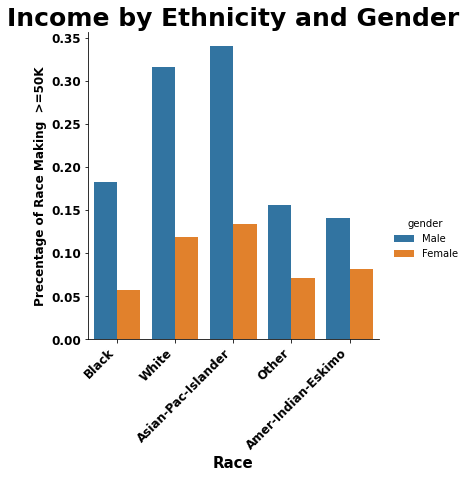

In [43]:
sns.catplot(x="race", y="income", hue="gender", kind="bar", data=dfc, ci= None)
plt.xticks(rotation= 45, fontsize = 12, fontweight = 'bold', ha ='right')
plt.yticks(fontsize = 12, fontweight= "bold")
plt.xlabel('Race',fontweight='bold', fontsize='15')
plt.ylabel('Precentage of Race Making  >=50K',fontweight='bold', fontsize='12')
plt.title('Income by Ethnicity and Gender',fontweight='bold', color = 'Black', fontsize='25');

The Second trend is income by ethnicity and gender
- The trend in this data set is that Asian -Pac-Islanders are earning a higher income than any other ethnicity.
- There is a large disparity between whites and blacks. 
- Black females seem to be the least precentage of people making greater than 50k.

##**Create Machine Models**



###**Logistic Regression Model**

In [44]:
# Make a Logistic Regression instance
lr = LogisticRegression(random_state= 42)

In [45]:
# Create pipeline
lr_pipe = make_pipeline(preprocessor, lr)

In [46]:
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
lr_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f630db8e1f0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f630db8e190>)])),
                ('logisticregression', LogisticRegression(random_state=42))])

In [47]:
# Make predictions using the training and testing data
train_pred = lr_pipe.predict(X_train)
test_pred = lr_pipe.predict(X_test)
train_pred[:10]

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

In [48]:
# evaluate the model
train_score = lr_pipe.score(X_train, y_train)
test_score = lr_pipe.score(X_test, y_test)
print(train_score)
print(test_score)

0.8536018801923918
0.853090670601738


###**Use GridSearchCV**

##**Random Forest Model**

In [49]:
# Make a Random Forest Instance 
rf = RandomForestClassifier(random_state = 42)

In [50]:
# Looking at some hyperparameters that seem tunable
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [51]:
# Create pipeline
rf_pipe = make_pipeline(preprocessor, rf)


In [52]:
# Training the model on the data, storing the information learned from the data
# Model is learning the relationship between X and y 
rf_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f630db8e1f0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f630db8e190>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [53]:
# Make predictions using the training and testing data
train_pred = rf_pipe.predict(X_train)
test_pred = rf_pipe.predict(X_test)
train_pred[:10]

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [54]:
# evaluate the model
train_score = rf_pipe.score(X_train, y_train)
test_score = rf_pipe.score(X_test, y_test)
print(train_score)
print(test_score)

0.9999726716222125
0.8583374323659616


###**Use GridSearchCV**

In [55]:
#create and visualize our parameter grid
param_grid = {'max_depth': [1,2,3],
              'min_samples_leaf': [3,15,20],
              'min_samples_split': [2, 10, 100]}
 
pd.DataFrame(param_grid).T

,0,1,2
max_depth,1,2,3
min_samples_leaf,3,15,20
min_samples_split,2,10,100


In [ ]:
scores = {}
 
#loop through all combinations of values for all hyperparameters
for d in param_grid['max_depth']:
  for l in param_grid['min_samples_leaf']:
    for s in param_grid['min_samples_split']:
      #fit a model for each combination of hyperparameter values
      model = RandomForestClassifier(max_depth=d,
                                     min_samples_leaf=l,
                                     min_samples_split=s)
      model = rf_pipe.fit(X_train,y_train)
      score = model.score(X_test, y_test)
      #add the model accuracy to a dictionary with the parameter settings as the
      #keys and the accuracies as the values.
      scores[f'max_depth {d}, min_samples_leaf {l}, min_samples_split {s} accuracy'] = score.round(6) * 100
 
#Display dictionary of scores
scores

In [ ]:
dt_grid_search = GridSearchCV(model, param_grid)

In [ ]:
rf.get_params().keys()